In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

In [19]:
#########################################
# part (a)
#########################################

def normalize(a):
    return (a-a.mean())/a.std()

def sigmoid(a):
    return 1/(1+np.exp(-a))

def H_LL(X,theta):
    return -(X.T@X)*(sigmoid(X@theta)*(1-sigmoid(X@theta))).sum()

def grad_LL(X,Y,theta):
    return X.T@(Y-sigmoid(X@theta))

# note we have to maximize LL -> minimize NLL
# but this doesn't matter in Newton: will find roots of first derivative anyway
def newton_iteration(X,Y,theta):
    return theta - np.linalg.inv(H_LL(X,theta))@grad_LL(X,Y,theta)

def newton_optimize(X,Y,theta,n_iter=1000):
    
    for i in range(n_iter):
        theta = newton_iteration(X,Y,theta)
        
    return theta

# TODO make a class that would learn and fit parameters!

In [79]:
#########################################
# part (b)
#########################################

def plot_data(X,Y,theta,save_file_name=None):
    X_x, X_y = X.T
    slope, intercept = -theta[1][0]/theta[2][0], -theta[0][0]/theta[2][0], 
    color = np.where(Y == 1, 'red', 'green').squeeze()
    s = plt.scatter(X_x,X_y,c=Y.squeeze(),cmap=ListedColormap(['red','green']))
    plt.axline((0,intercept), slope=slope, color='b', label='Boundary')
    
    plt.title('Scatter plot of Datapoints and Decision Boundary')
    plt.xlabel('x_0 (normalized)')
    plt.ylabel('x_1 (normalized)')
    labels = ['0','1']
    plt.legend(handles=s.legend_elements()[0], labels=labels)
    
    if save_file_name:
        plt.savefig(save_file_name, dpi=150, bbox_inches='tight')

In [73]:
# [StopConvert]

In [74]:
trainX = pd.read_csv('../data/q3/X.csv',header=None).to_numpy()
trainY = pd.read_csv('../data/q3/Y.csv',header=None).to_numpy()
normX = normalize(trainX)

X = np.column_stack([np.full(len(normX),1),normX])
Y = trainY.reshape(-1,1)

In [75]:
theta_opt = newton_optimize(X,Y,theta=np.array([[0],[0],[0]]))

In [76]:
theta_opt

array([[ 0.10870269],
       [ 2.2504318 ],
       [-2.23473995]])

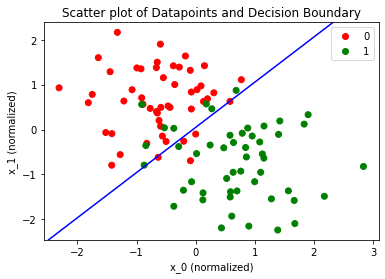

In [81]:
plot_data(normX,Y,theta_opt,save_file_name='plots/b_scatter.png')